In [1]:
##  Imports

import importlib
import sys
sys.path.append('../task')

import collections
import json
from matplotlib import pyplot as plt
import os
import pandas as pd
import seaborn as sns

import scipy.io

from moog_demos import gif_writer as gif_writer_lib
from moog import maze_lib
from moog import observers

from utils import common
from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import trial_video
from utils import performance

importlib.reload(common)
importlib.reload(get_trial_dataframe)
importlib.reload(get_trial_paths)
importlib.reload(trial_video)
importlib.reload(performance)

# For matplotlib inline animations to show
%matplotlib inline

In [2]:
##  Define behavior data path

DATA_TAIL = '2021_05_13_12_29_07' # 1st pilot (w/o eye movement)

DATA_PATH = os.path.join(
    os.getcwd(),
    'data/',
    DATA_TAIL,
)

SAVE_PATH = DATA_PATH+'.mat'

In [3]:
##  Load behavior data

importlib.reload(get_trial_paths)
importlib.reload(get_trial_dataframe)

trial_paths, stimulus_features = get_trial_paths.get_trial_paths(DATA_PATH)
trial_df = get_trial_dataframe.get_trial_dataframe(trial_paths, stimulus_features)

Number of trials:  501
trial_df columns: ['trial_num', 'path_length', 'name', 'num_turns', 'start_x']
Unique Values:
path_length: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 36 37 38 39 40 42 44 45 46 49 57]
name: ['Random12']
num_turns: [0 1 2 3 4 5 6 7 8 9]
start_x: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [4]:
##  Add performance to trial_df

performance.add_response_error_to_trial_df(trial_df, trial_paths)

In [5]:
# performance.add_rt_offline_to_trial_df(trial_df, trial_paths)

KeyboardInterrupt: 

In [5]:
scipy.io.savemat(SAVE_PATH,{'trial_df':trial_df.to_dict("list")})


<AxesSubplot:xlabel='path_length', ylabel='prey_distance_at_response'>

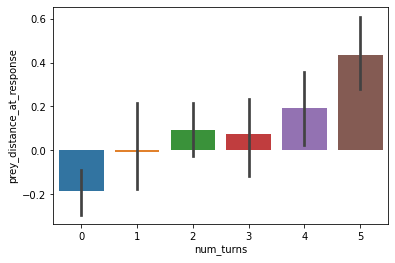

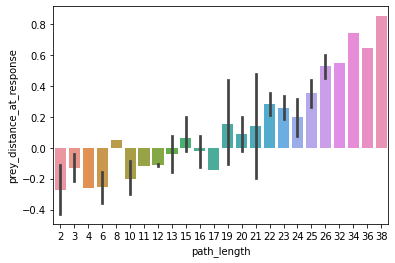

In [14]:
# fig, ax = plt.subplots()
# sns.barplot(ax=ax, data=trial_df, y='prey_distance_at_response', x='num_turns')
#
# fig, ax = plt.subplots()
# sns.barplot(ax=ax, data=trial_df, y='prey_distance_at_response', x='path_length')